# Kunskapskontroll 3

## Vi analyserar påverkan av huspriser
### Uppgifter på hus med högsta värderingarna

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_housing = pd.read_csv("housing.csv")
#df_housing.head(10)
df_housing.nlargest(5, 'median_house_value', 'first')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY


### Uppgifter på hus med lägsta värderingarna

In [186]:
df_housing.nsmallest(5, 'median_house_value', 'first')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2521,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
2799,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
9188,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
19802,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
5887,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN


### Vi undersöker om närhet till havet har en påverkan på priset
#### För varje unikt avstånd till havet räknar vi ut genomsnittliga priset och visar det i ett diagram för att jämföra

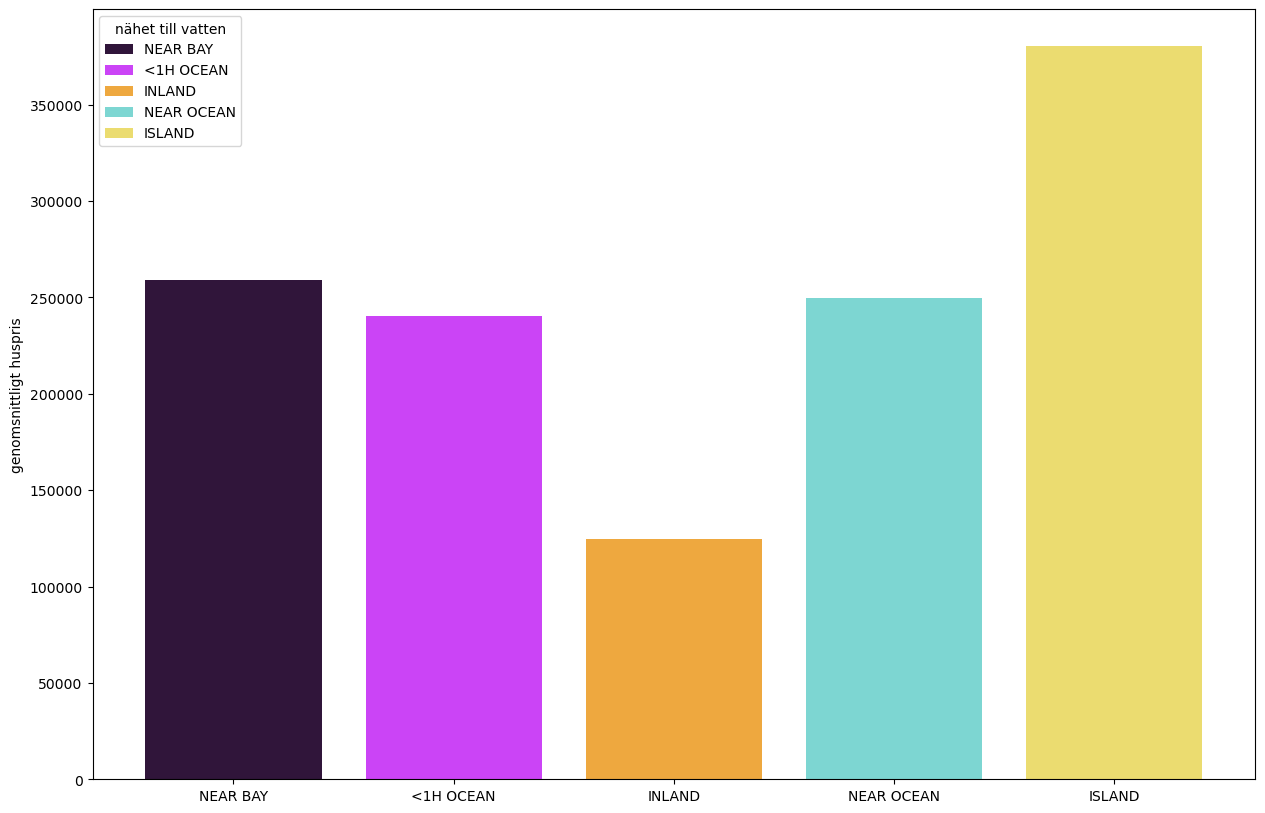

In [226]:
närhet_till_vatten=df_housing['ocean_proximity'].unique()
#Vi loopar genom de olika avstånden till vatten
#och sparar genomsnittliga huspriset för dessa avstånd
df_pris=pd.DataFrame({'närhet_till_vatten': [''], 'genomsnittligt huspris': [0]})
for närhet in närhet_till_vatten:
    df_närhet=df_housing[df_housing['ocean_proximity'] == närhet]
    #räkna ut genomsnittliga huspriset för posterna i df_närhet
    genomsnittligt_pris=df_närhet['median_house_value'].mean()
    ny_rad={'närhet_till_vatten': närhet, 'genomsnittligt huspris': genomsnittligt_pris}
    df_pris.loc[len(df_pris)]=ny_rad


df_pris=df_pris.drop(0).reset_index(drop=True)#Första raden är tom
df_pris=df_pris.dropna()
fig, ax = plt.subplots(figsize=(15, 10))
färger = np.random.rand(len(df_pris), 3)
ax.bar(df_pris['närhet_till_vatten'], df_pris['genomsnittligt huspris'], label=df_pris['närhet_till_vatten'], color=färger)
ax.legend(title='nähet till vatten')
ax.set_ylabel('genomsnittligt huspris')
plt.show()


#### Det verkar som närhet till vatten har en avgörande betydelse för värdet på hus.

#### För att se sambandet mellan huspriser och övriga data undersöker vi keeraltions-matrisen nedan.
#### Här ser vi att även medel-inkomsten har en stor betydelse för huspriser.

In [214]:
df_corr = df_housing.drop('ocean_proximity', axis=1)
corr=df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000
